In [1]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon

import shapefile

import numpy as np
import matplotlib.pyplot as plt
import io
import cv2
import glob


In [2]:
aari_path = r'E:\\python_workfile\\sea_ice_classification\\data\\mask\\aari\\'

In [3]:

# define a function which returns an image as numpy array from figure

def get_img_from_fig(fig, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=180)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


In [8]:
def draw_aari_icetype(file,save_path):
    fig = plt.figure(figsize=(9, 9))
    ax1 = fig.add_subplot(111)
    fig.set_tight_layout(True) # reduce the spaces from margin outside the axis 
    # ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='c')
    m.drawmapboundary()

    shp_info = m.readshapefile(file,'aari_arc',drawbounds=False)
    colors = {-9:'cyan',8:'y',82: 'b',83:'blueviolet',86:'g',95:'brown'}

    for info, shp in zip(m.aari_arc_info, m.aari_arc):
        type_a = int(info['SA'])
        fast_ice = int(info['FA'])
        if type_a in colors.keys():
            poly = Polygon(shp, facecolor=colors[type_a], lw=3)  
            ax1.add_patch(poly)
        if fast_ice in colors.keys():
            poly = Polygon(shp, facecolor=colors[fast_ice], lw=3)  
            ax1.add_patch(poly)
    plt.savefig(save_path,dpi=180,bbox_inches='tight',pad_inches = 0, edgecolor = 'white')
#     plt.show()
    return fig

In [5]:
dir_path = r'H:\\remote_sensing_data\\sea_ice_type\\aari\\'
files = glob.glob(dir_path + '*.shp')
# shps = shapefile.Reader(file)
# shp = shps.shapeRecord()
# shps_pandas = geopandas.read_file(file+'.shp')
# shps.plot()


In [16]:
plot_img_np.shape

(1620, 1620, 3)

KeyboardInterrupt: 

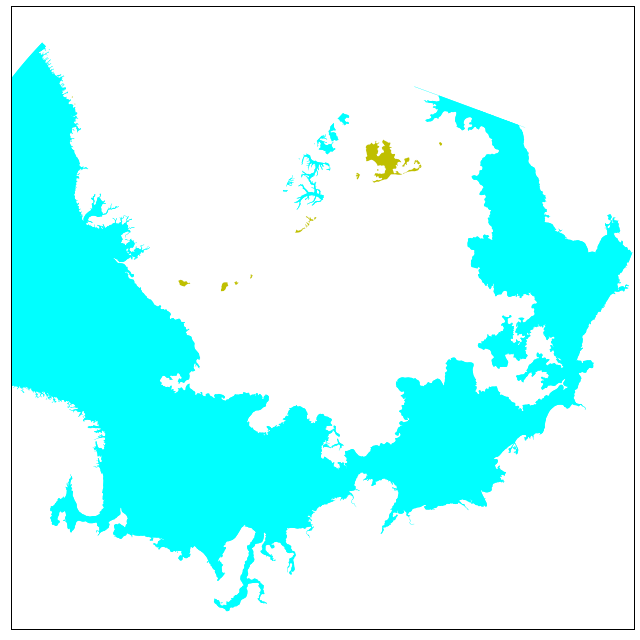

In [10]:
for file in files[82:]:
    file = file.split('.')[0]
    day = file.split('_')[-3]
    fig = draw_aari_icetype(file,save_path=aari_path + 'pic\\' + str(day) + '.png')
    plot_img_np = get_img_from_fig(fig)
    np.save((aari_path + 'npy\\' + str(day) + '.npy'), plot_img_np)
    print(day)


In [ ]:
for file in glob.glob(r'E:\python_workfile\sea_ice_classification\data\mask\aari\npy\\'+'*.npy'):
    pic = np.load(file)
    plt.imshow(pic)
    plt.close()

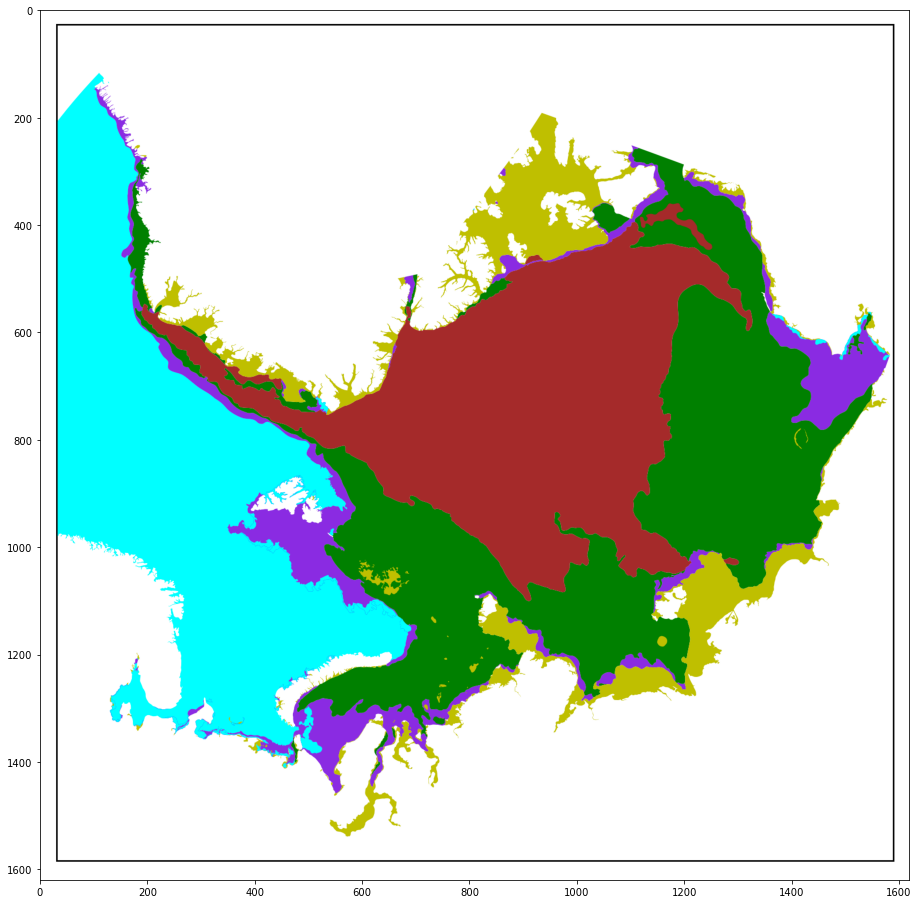

In [6]:
pic = np.load(glob.glob(r'E:\python_workfile\sea_ice_classification\npy\aari_'+'*.npy')[1])
fig = plt.figure(figsize=(16,16))
plt.imshow(pic)


In [3]:
pic = np.load(glob.glob(r'E:\python_workfile\sea_ice_classification\npy\aari_'+'*.npy')[1])

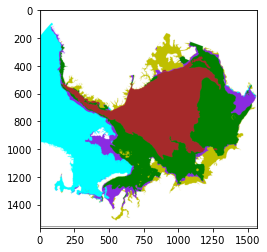

In [7]:
plt.imshow(pic[26:-26,26:-26,:])